<a href="https://colab.research.google.com/github/pedrossntos/cnn-ex/blob/main/deepforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepforest #deepforest-1.5.2-py3-none-any
!pip install torch torchvision

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.8 MB/s eta 0:00:00
  

In [3]:
from deepforest import main
from deepforest.visualize import plot_predictions
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

model = main.deepforest()
model.use_release()

Reading config file: /usr/local/lib/python3.11/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

Reading config file: /usr/local/lib/python3.11/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


model.safetensors:   0%|          | 0.00/129M [00:00<?, ?B/s]

{75F8BC19-E70D-4E54-A2B1-6999D1A5BCE9}.png


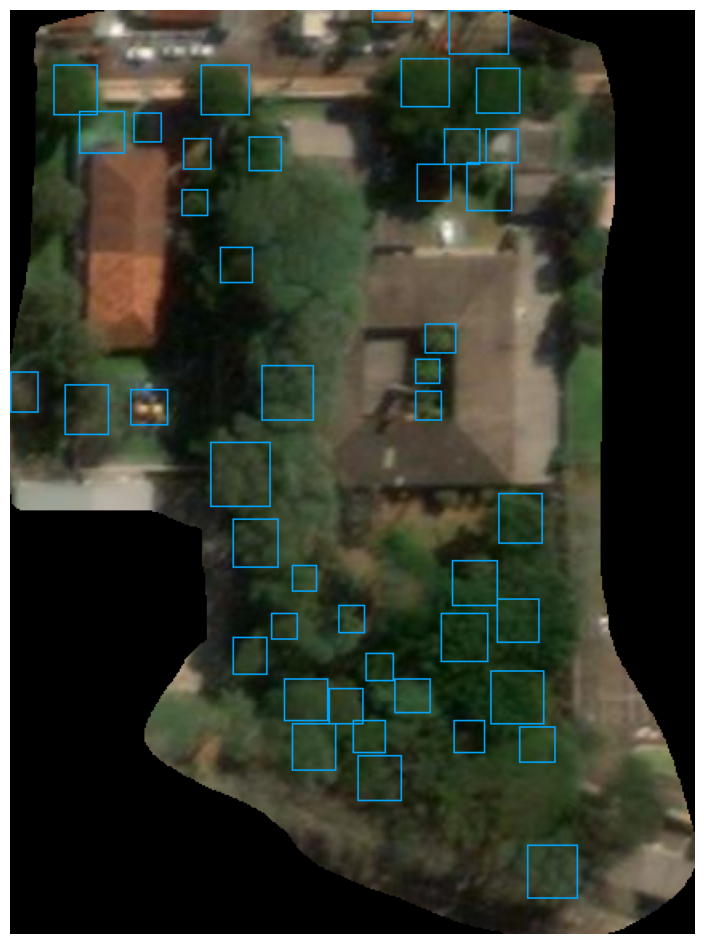

total de árvores detectadas: 44
{F5698C8A-3E40-4900-B23E-D337FE865131}.png


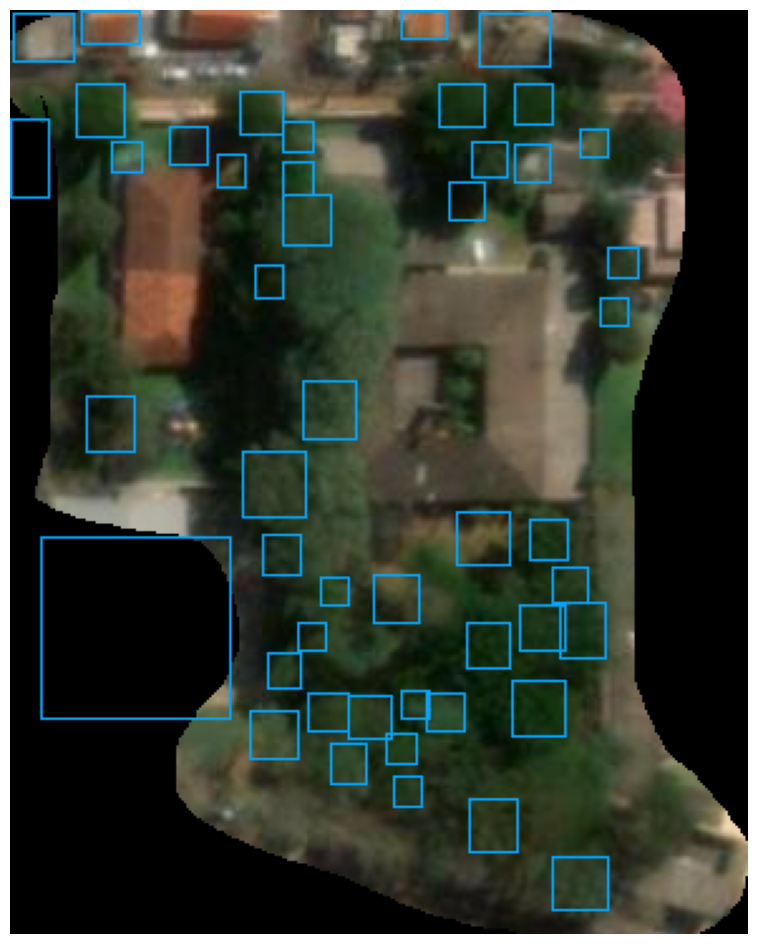

total de árvores detectadas: 48
total de árvores detectadas no conjunto de imagens: 92


In [26]:
path = 'images'
extensoes = ('.jpg', '.jpeg', '.png')
total_trees = 0

for n_img in os.listdir(path):
    if n_img.lower().endswith(extensoes):
        print(n_img)
        try:
            img = Image.open(path+'/'+n_img).convert("RGB")
        except Exception as e:
            print(f"erro ao abrir {n_img}: {e}")
            continue  ;
        img_np = np.array(img).astype('float32')

        try:
            boxes = model.predict_image(img_np)
            plot_image = plot_predictions(img_np, boxes)

            plt.figure(figsize=(12, 12))
            plt.imshow(plot_image)
            plt.axis('off')

            output_img = os.path.abspath(f"output_image_{os.path.splitext(n_img)[0]}.png")
            plt.savefig(output_img, bbox_inches='tight', pad_inches=0)

            plt.show()

            print(f"total de árvores detectadas: {len(boxes)}")
            total_trees += len(boxes)
        except Exception as e:
            print(f"erro na predição ou plotagem para {n_img}: {e}")

print(f"total de árvores detectadas no conjunto de imagens: {total_trees}")